<a href="https://colab.research.google.com/github/RaulCabreraUtria/supermarketanalisis/blob/main/SuperMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from ctypes import Array
import locale
from matplotlib.widgets import TextBox
import matplotlib.pyplot as plt
import textwrap
%matplotlib inline
global df_ventas, df_ventas_limpio
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',10)
dbcsv = 'reporte_ventas.csv'
lista_ToDateFormat=list
df_ventas=pd.DataFrame
df_ventas_limpio=pd.DataFrame


1.Metodos para obtener datos

In [ ]:
def obtencion_datos(rutacsv,separator):
    return pd.read_csv(rutacsv, sep=separator)


2.Metodo para convertir a datetime :
Este metodo recibe un arreglo de series las cuales convierte a formato datetime

In [ ]:
def formatear_columnas(dataToFormat):
  for item in dataToFormat:
      df_ventas[item.name]=pd.to_datetime(item,format='%Y-%m-%d')


In [ ]:
df_ventas=obtencion_datos(dbcsv,',')

In [ ]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int64  
 15  tota

Ejecutamos el metodo para formatear

In [ ]:
lista_ToDateFormat=[df_ventas.fecha_envio,df_ventas.fecha_pedido]
formatear_columnas(lista_ToDateFormat)


In [ ]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           8954 non-null   datetime64[ns]
 1   fecha_envio            8954 non-null   datetime64[ns]
 2   modo_envio             8954 non-null   object        
 3   nombre_cliente         8952 non-null   object        
 4   segmento_cliente       8954 non-null   object        
 5   ciudad                 8954 non-null   object        
 6   estado                 8954 non-null   object        
 7   region                 8954 non-null   object        
 8   departamento_producto  8954 non-null   object        
 9   tipo_producto          8954 non-null   object        
 10  precio_base            8954 non-null   float64       
 11  precio_unit_sin_desc   8954 non-null   float64       
 12  descuento              8954 non-null   float64       
 13  pre

In [ ]:
df_ventas.duplicated() ##Consultando duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
8949     True
8950     True
8951     True
8952     True
8953     True
Length: 8954, dtype: bool

In [ ]:
df_ventas_limpio=df_ventas.drop_duplicates() ## Creamos un nuevo dataframe sin datos duplicados

In [ ]:
df_ventas_limpio.duplicated() ## Evaluamos que ya no hay datos duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
8935    False
8936    False
8937    False
8938    False
8939    False
Length: 8939, dtype: bool

In [ ]:
##Metodo que devuelve la cantida de datos encontrados por criterio de busqueda en una serie
def encontrar_dato(serie,criterio):
    count=0
    for item in serie:
      if item==criterio:
         count=count+1
    return count


In [ ]:
 ##Metodo que devuelve un boolean si encuentra el criterio de busqueda
def criterio_existe(serie,criterio):
    validador=False
    if(encontrar_dato(serie,criterio)>0):
       validador=True
    return validador

In [ ]:
## Comprobar nuemro de datos repetidos segun critero
encontrar_dato(df_ventas_limpio['nombre_cliente'],'prueba')

4

In [ ]:
## Bloque de ejecucion de codigo con condicional implementamos el metodo que creamos con anterioridad que retorna un valor Boolean si detecta datos con el criterio
if(criterio_existe(df_ventas_limpio['nombre_cliente'],'prueba')):
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['nombre_cliente']=='prueba')].index,inplace=True)
else:
  print('Dato de busqueda no encontrado')


<ipython-input-635-291eaf69a61f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['nombre_cliente']=='prueba')].index,inplace=True)


In [ ]:
## Validar que realmente elimino los datos repetidos
encontrar_dato(df_ventas_limpio['nombre_cliente'],'prueba')

0

In [ ]:
##Forma de consultar el numero de valores nulos a una serie
df_ventas_limpio['nombre_cliente'].isnull().sum()

2

In [ ]:
df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['nombre_cliente'].isnull())].index,inplace=True)

<ipython-input-638-fbccb963a079>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['nombre_cliente'].isnull())].index,inplace=True)


In [ ]:
## Validar si elimino los null
df_ventas_limpio['nombre_cliente'].isnull().sum(axis=0)

0

In [ ]:
df_valores_neg=df_ventas_limpio.copy()

In [ ]:
df_valores_neg['total_ganancia'].sum()

454244.35000000003

In [ ]:
df_valores_neg['año']=df_valores_neg['fecha_envio'].dt.year

In [ ]:
df_valores_neg['total_ganancia'][(df_valores_neg['total_ganancia']<=0)].sum()

-242725.95

In [ ]:
df_valores_neg['total_ganancia'][(df_valores_neg['total_ganancia']>0)].sum()

696970.3

In [ ]:
## Eliminar datos donde el total de la ganancia se menor o igual a cero el obejtivo es dejar solo los registros que generaron ganacia
df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['total_ganancia']<=0)].index,inplace=True)

<ipython-input-645-6c781772abb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['total_ganancia']<=0)].index,inplace=True)


In [ ]:
df_ventas_limpio

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,...,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,...,0.0,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,...,0.0,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,...,0.0,24.86,2,49.72,11.68
4,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,...,0.1,38.02,2,76.04,4.28
5,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,...,0.0,23.73,7,166.11,24.08
...,...,...,...,...,...,...,...,...,...,...,...
8935,2021-09-30,2021-10-04,Entrega estándar,Enrique Santos,B2C,...,0.0,123.22,1,123.22,25.88
8936,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,...,0.0,271.97,1,271.97,48.96
8937,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,...,0.0,140.15,5,700.75,94.60
8938,2019-01-22,2019-01-24,Económico,Isabel Araújo,B2C,...,0.1,28.61,3,85.83,6.96


In [ ]:
## Reseteamos los indices

df_ventas_limpio.reset_index()

,index,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,...,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,0,2021-11-09,2021-11-12,Económico,Thiago Silveira,...,0.0,445.33,2,890.66,71.26
1,1,2021-11-09,2021-11-12,Económico,Thiago Silveira,...,0.0,829.53,3,2488.59,373.29
2,2,2021-06-13,2021-06-17,Económico,Giovanna Lima,...,0.0,24.86,2,49.72,11.68
3,4,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,...,0.1,38.02,2,76.04,4.28
4,5,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,...,0.0,23.73,7,166.11,24.08
...,...,...,...,...,...,...,...,...,...,...,...
7205,8935,2021-09-30,2021-10-04,Entrega estándar,Enrique Santos,...,0.0,123.22,1,123.22,25.88
7206,8936,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,...,0.0,271.97,1,271.97,48.96
7207,8937,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,...,0.0,140.15,5,700.75,94.60
7208,8938,2019-01-22,2019-01-24,Económico,Isabel Araújo,...,0.1,28.61,3,85.83,6.96


In [ ]:
df_ventas_limpio.isnull()

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,...,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,False,False,False,False,False,...,False,False,False,False,False
1,False,False,False,False,False,...,False,False,False,False,False
2,False,False,False,False,False,...,False,False,False,False,False
4,False,False,False,False,False,...,False,False,False,False,False
5,False,False,False,False,False,...,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8935,False,False,False,False,False,...,False,False,False,False,False
8936,False,False,False,False,False,...,False,False,False,False,False
8937,False,False,False,False,False,...,False,False,False,False,False
8938,False,False,False,False,False,...,False,False,False,False,False


In [ ]:
## variable axis=0 Suma de forma vertical axis=1 suma de forma horizontal
df_ventas.isnull().sum(axis=0)

fecha_pedido         0
fecha_envio          0
modo_envio           0
nombre_cliente       2
segmento_cliente     0
                    ..
descuento            0
precio_unit_venta    0
cantidad_pedido      0
total_venta          0
total_ganancia       0
Length: 17, dtype: int64

In [ ]:
df_ventas_limpio.isnull().sum()

fecha_pedido         0
fecha_envio          0
modo_envio           0
nombre_cliente       0
segmento_cliente     0
                    ..
descuento            0
precio_unit_venta    0
cantidad_pedido      0
total_venta          0
total_ganancia       0
Length: 17, dtype: int64

In [ ]:
print('Información:')
print(df_ventas_limpio.info())
print('------------')
print('nulos:')
print(df_ventas_limpio['nombre_cliente'].isnull().sum())
print('------------')
print('nulos en todas las columnas:')
print(df_ventas_limpio.isnull().sum())
print('------------')
print('Duplicados:')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancia<=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum())

Información:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7210 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           7210 non-null   datetime64[ns]
 1   fecha_envio            7210 non-null   datetime64[ns]
 2   modo_envio             7210 non-null   object        
 3   nombre_cliente         7210 non-null   object        
 4   segmento_cliente       7210 non-null   object        
 5   ciudad                 7210 non-null   object        
 6   estado                 7210 non-null   object        
 7   region                 7210 non-null   object        
 8   departamento_producto  7210 non-null   object        
 9   tipo_producto          7210 non-null   object        
 10  precio_base            7210 non-null   float64       
 11  precio_unit_sin_desc   7210 non-null   float64       
 12  descuento              7210 non-null   float64   

3.1 Crea una función pregunta_1(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

In [ ]:
## Creamos funcion con la ejecucion

def pregunta_1():
  global df_ventas
  global df_ventas_limpio
  df_ventas=obtencion_datos(dbcsv,',')
  print(df_ventas.info())
  df_ventas['fecha_pedido']=pd.to_datetime(df_ventas['fecha_pedido'],format='%Y-%m-%d')
  df_ventas['fecha_envio']=pd.to_datetime(df_ventas['fecha_envio'],format='%Y-%m-%d')
  df_ventas_limpio=df_ventas.drop_duplicates()
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['nombre_cliente']=='prueba')].index,inplace=True)
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['nombre_cliente'].isnull())].index,inplace=True)
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['total_ganancia']<=0)].index,inplace=True)
  df_ventas_limpio.reset_index()
  print('Información:')
  print(df_ventas_limpio.info())
  print('------------')
  print('nulos:')
  print(df_ventas_limpio['nombre_cliente'].isnull().sum())
  print('------------')
  print('nulos en todas las columnas:')
  print(df_ventas_limpio.isnull().sum())
  print('------------')
  print('Duplicados:')
  print(df_ventas_limpio.duplicated().sum())
  print('------------')
  print('Registros de prueba:')
  print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
  print('------------')
  print('Registros con ganancia<=0:')
  print((df_ventas_limpio['total_ganancia'] <= 0).sum())


In [ ]:
pregunta_1()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int64  
 15  tota

<ipython-input-652-694b46c4b43f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['nombre_cliente']=='prueba')].index,inplace=True)
<ipython-input-652-694b46c4b43f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['nombre_cliente'].isnull())].index,inplace=True)
<ipython-input-652-694b46c4b43f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

3.1.1 Preparando datos Creamos variable df_ventas_años con las columnas fecha_pedido y total_venta

In [ ]:
##Creamos un nuevo dataframe con 2 columnas total_venta y fecha_pedido
df_ventas_años=df_ventas_limpio[['total_venta','fecha_pedido']].copy()

In [ ]:
df_ventas_años

,total_venta,fecha_pedido
0,890.66,2021-11-09
1,2488.59,2021-11-09
2,49.72,2021-06-13
4,76.04,2020-10-12
5,166.11,2019-06-10
...,...,...
8935,123.22,2021-09-30
8936,271.97,2022-11-18
8937,700.75,2022-11-18
8938,85.83,2019-01-22


3.1.2 Crear una nueva columna en un dataframe llamada año

In [ ]:
## Metdodo que extrae solo los valores por año .dt.year de una columna y los almacena en una nueva columna llamada año

df_ventas_años['año']=df_ventas_años['fecha_pedido'].dt.year


In [ ]:
df_ventas_años

,total_venta,fecha_pedido,año
0,890.66,2021-11-09,2021
1,2488.59,2021-11-09,2021
2,49.72,2021-06-13,2021
4,76.04,2020-10-12,2020
5,166.11,2019-06-10,2019
...,...,...,...
8935,123.22,2021-09-30,2021
8936,271.97,2022-11-18,2022
8937,700.75,2022-11-18,2022
8938,85.83,2019-01-22,2019


Eliminacion de Columna fecha_pedido

In [ ]:
## Metodo para eliminar coliumna fecha_pedido
df_ventas_años.drop('fecha_pedido',axis=1,inplace=True)

In [ ]:
print(df_ventas_años)

      total_venta   año
0          890.66  2021
1         2488.59  2021
2           49.72  2021
4           76.04  2020
5          166.11  2019
...           ...   ...
8935       123.22  2021
8936       271.97  2022
8937       700.75  2022
8938        85.83  2019
8939       826.74  2022

[7210 rows x 2 columns]


In [ ]:
## Forma de agrupar x año con columna total_venta sumada y resetamos los indiex este dato lo almacenamos en un dataframe

df_ventas_años=df_ventas_años.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()


In [ ]:
df_ventas_años['año']

0    2019
1    2020
2    2021
3    2022
Name: año, dtype: int64

In [ ]:
df_ventas_años['total_venta']

0    1052735.86
1    1190541.40
2    1535801.44
3    1825927.50
Name: total_venta, dtype: float64

In [ ]:
## Metodo tradicional fig,ax = plt.subplots(figsize=(10,4))
df_ventas_años





,año,total_venta
0,2019,1052735.86
1,2020,1190541.40
2,2021,1535801.44
3,2022,1825927.50


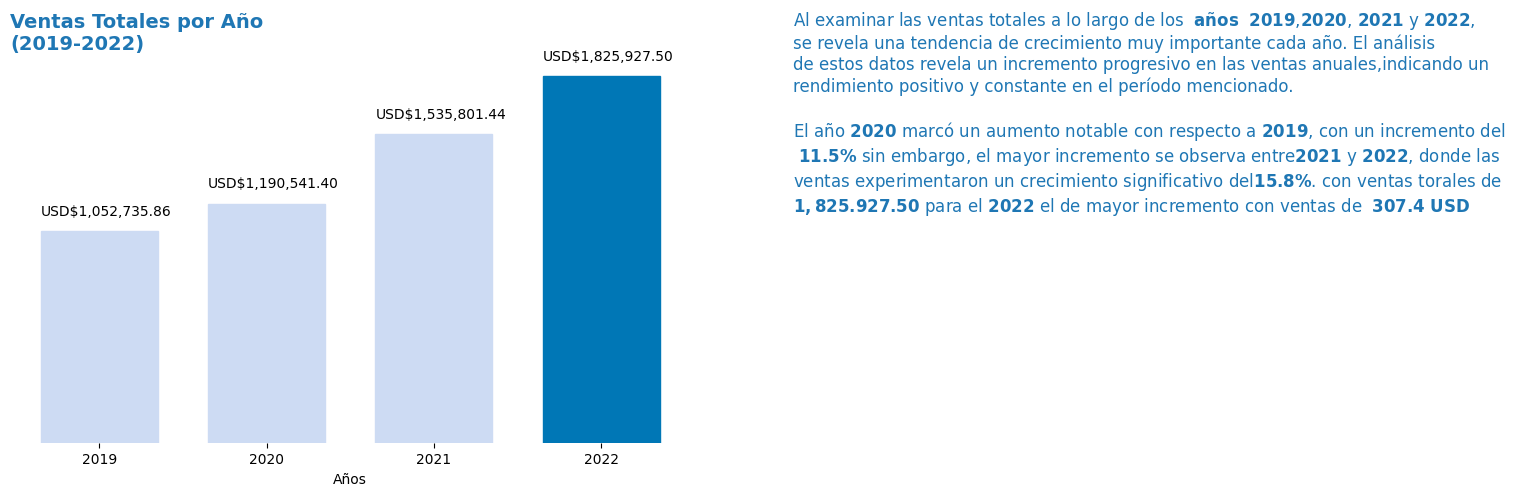

In [ ]:
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
fig,ax = plt.subplots(1,2,figsize=(18,5))
fig.subplots_adjust(wspace=0.05)
ax[0].bar(x=df_ventas_años['año'],height=df_ventas_años['total_venta'],width=0.7)
fig.set_label('Ventas Totales')
año_max=df_ventas_años['año'].max()
año_min=df_ventas_años['año'].min()
## Colocamos titulo al primer grafico
ax[0].set_title(f"{'Ventas Totales por Año'}\n({año_min}-{año_max})",loc='left',fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
# Controlar el formato de las etiquetas del eje X
ax[0].set_xticks(df_ventas_años['año'])
ax[0].set_xticklabels(df_ventas_años['año'].astype(int))
##Configuramos las lineas
ax[0].spines['top'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].spines['bottom'].set_color('none')
ax[0].spines['left'].set_color('none')
ax[0].spines['right'].set_color('none')
ax[0].get_yaxis().set_visible(False)
ax[0].set_xlabel('Años')
## Metodo que oculta los ejes
##plt.gca().set_axis_off()
valormay=df_ventas_años['total_venta'].max()
for bar in ax[0].patches:
  qtd=''
  valor = bar.get_height()
  ##Convertimos un string de mejor lectura
  val_conve=locale.currency(valor, grouping=True)
  if(valor==valormay):
   ##print(val_conve)
   ##print('Mayor encontrado')
   bar.set_color('#0077b6')
   #qtd = f"{'USD$'}{valor}\n"
   qtd = f"{'USD'}{val_conve}\n"
   ax[0].text(bar.get_x()-0.35+bar.get_width()/2,valor,qtd)
  else:
      bar.set_color('#CDDBF3')
      ##qtd = f"{'USD$'}{valor}\n"
      qtd = f"{'USD'}{val_conve}\n"
      ax[0].text(bar.get_x()-0.35+bar.get_width()/2,valor,qtd)

 ##Colocamos informacion de analisis
texto = ( "Al examinar las ventas totales a lo largo de los  $\\mathbf{años}$  $\\mathbf{2019}$,$\\mathbf{2020}$, $\\mathbf{2021}$ y $\\mathbf{2022}$,\n"
             "se revela una tendencia de crecimiento muy importante cada año. El análisis\n"
            "de estos datos revela un incremento progresivo en las ventas anuales,indicando un \n"
            "rendimiento positivo y constante en el período mencionado.\n\n"
            "El año $\\mathbf{2020}$ marcó un aumento notable con respecto a $\\mathbf{2019}$, con un incremento del\n"
            " $\\mathbf{11.5\\%}$ sin embargo, el mayor incremento se observa entre $\\mathbf{2021}$ y $\\mathbf{2022}$, donde las\n"
            "ventas experimentaron un crecimiento significativo del$\\mathbf{15.8\\%}$. con ventas torales de \n"
          "$\\mathbf{1,825.927.50}$ para el $\\mathbf{2022}$ el de mayor incremento con ventas de  $\\mathbf{307.4}$ $\\mathbf{USD}$"
            )

ax[1].text(0.1,0.6,texto,ha='left',fontdict = {'fontsize':12, 'color':'tab:blue'})
ax[1].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].spines['top'].set_color('none')
ax[1].spines['bottom'].set_color('none')
ax[1].spines['left'].set_color('none')
ax[1].spines['right'].set_color('none')






Pregunta 2

Crea una función pregunta_2(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

In [ ]:
def  pregunta_2():
    global df_ventas, df_ventas_limpio
    # Creamos un nuevo df con las columnas de fecha
    df_ventas_años = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()
    # Creamos una nueva columna año
    df_ventas_años['año'] = df_ventas_años['fecha_pedido'].dt.year
    # Eliminamos la columna fecha_pedido
    df_ventas_años.drop(['fecha_pedido'], axis=1, inplace=True)
    # agrupamos por la columna año y sumamos los valores
    df_ventas_años = df_ventas_años.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()
    # graficamos
    # Creamos una lista de colores
    locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
    fig,ax = plt.subplots(1,2,figsize=(18,5))
    fig.subplots_adjust(wspace=0.05)
    ax[0].bar(x=df_ventas_años['año'],height=df_ventas_años['total_venta'],width=0.7)
    fig.set_label('Ventas Totales')
    año_max=df_ventas_años['año'].max()
    año_min=df_ventas_años['año'].min()
    ## Colocamos titulo al primer grafico
    ax[0].set_title(f"{'Ventas Totales por Año'}\n({año_min}-{año_max})",loc='left',fontdict = {'fontsize':14, 'fontweight':'bold','color':'tab:blue'})
    # Controlar el formato de las etiquetas del eje X
    ax[0].set_xticks(df_ventas_años['año'])
    ax[0].set_xticklabels(df_ventas_años['año'].astype(int))
    ##Configuramos las lineas
    ax[0].spines['top'].set_color('none')
    ax[0].spines['top'].set_color('none')
    ax[0].spines['bottom'].set_color('none')
    ax[0].spines['left'].set_color('none')
    ax[0].spines['right'].set_color('none')
    ax[0].get_yaxis().set_visible(False)
    ax[0].set_xlabel('Años')
    ## Metodo que oculta los ejes
    ##plt.gca().set_axis_off()
    valormay=df_ventas_años['total_venta'].max()
    for bar in ax[0].patches:
      qtd=''
      valor = bar.get_height()
      ##Convertimos un string de mejor lectura
      val_conve=locale.currency(valor, grouping=True)
      ## Buscamos el valor mayor para colorear la barra
      if(valor==valormay):
       ##print('Mayor encontrado')
       bar.set_color('#0077b6')
       #qtd = f"{'USD$'}{valor}\n"
       qtd = f"{'USD'}{val_conve}\n"
       ax[0].text(bar.get_x()-0.35+bar.get_width()/2,valor,qtd)
      else:
          bar.set_color('#CDDBF3')
          ##qtd = f"{'USD$'}{valor}\n"
          qtd = f"{'USD'}{val_conve}\n"
          ax[0].text(bar.get_x()-0.35+bar.get_width()/2,valor,qtd)



    ##Colocamos informacion de analisis
    texto = ( "Al examinar las ventas totales a lo largo de los  $\\mathbf{años}$  $\\mathbf{2019}$,$\\mathbf{2020}$, $\\mathbf{2021}$ y $\\mathbf{2022}$,\n"
             "se revela una tendencia de crecimiento muy importante cada año. El análisis\n"
            "de estos datos revela un incremento progresivo en las ventas anuales,indicando un \n"
            "rendimiento positivo y constante en el período mencionado.\n\n"
            "El año $\\mathbf{2020}$ marcó un aumento notable con respecto a $\\mathbf{2019}$, con un incremento del\n"
            " $\\mathbf{11.5\\%}$ sin embargo, el mayor incremento se observa entre $\\mathbf{2021}$ y $\\mathbf{2022}$, donde las\n"
            "ventas experimentaron un crecimiento significativo del$\\mathbf{15.8\\%}$. con ventas torales de \n"
          "$\\mathbf{1,825.927.50}$ para el $\\mathbf{2022}$ el de mayor incremento con ventas de  $\\mathbf{307.4}$ $\\mathbf{USD}$"
            )

    ax[1].text(0.1,0.6,texto,ha='left',fontdict = {'fontsize':12, 'color':'tab:blue'})
    ax[1].get_yaxis().set_visible(False)
    ax[1].get_xaxis().set_visible(False)
    ax[1].spines['top'].set_color('none')
    ax[1].spines['bottom'].set_color('none')
    ax[1].spines['left'].set_color('none')
    ax[1].spines['right'].set_color('none')



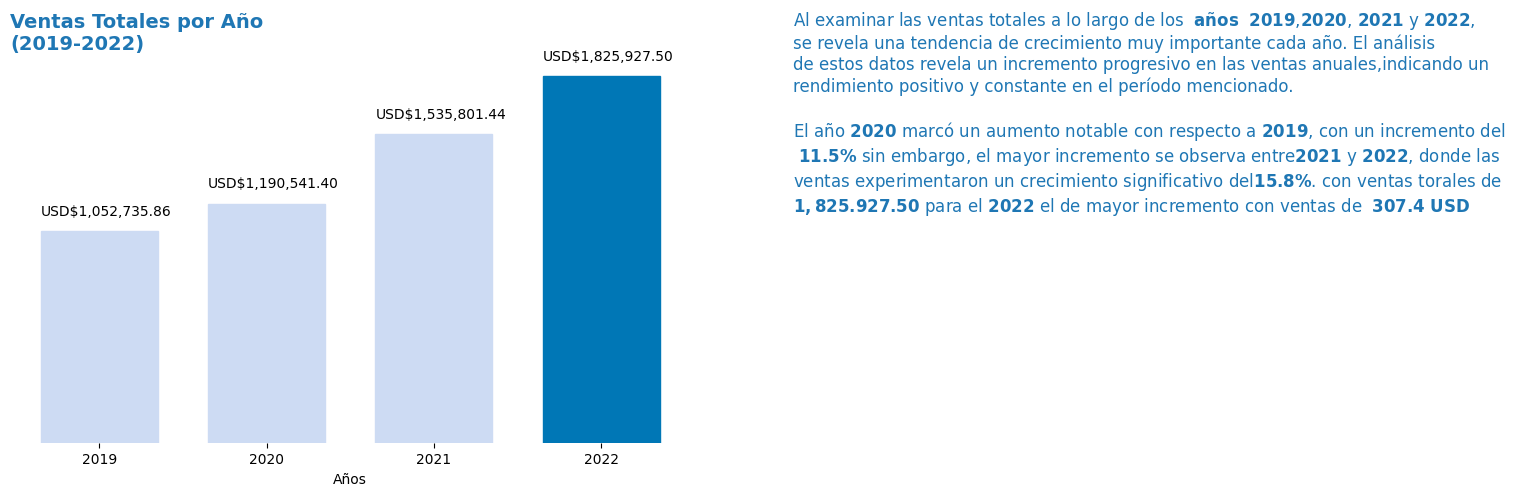

In [ ]:
pregunta_2()

1. Preparación de los datos:

Crea una copia de la base df_ventas_limpio en un nuevo dataframe df_top_ganancias y guarda unicamente las columnas 'tipo_producto' y 'total_ganancia'.

In [ ]:
##Copia de dataframe
df_top_ganancias=df_ventas_limpio[['tipo_producto','total_ganancia']].copy()

In [ ]:
df_top_ganancias

,tipo_producto,total_ganancia
0,Camisetas,71.26
1,Jeans,373.29
2,Toallitas desinfectantes,11.68
4,Papel higiénico,4.28
5,Vestidos,24.08
...,...,...
8935,Smartphones,25.88
8936,Smartphones,48.96
8937,Cámaras digitales,94.60
8938,Vestidos,6.96


Agrupacion por tipo de producto

In [ ]:
df_top_ganancias=df_top_ganancias.groupby("tipo_producto").aggregate({'total_ganancia':'sum'}).reset_index()

In [ ]:
print(df_top_ganancias)

               tipo_producto  total_ganancia
0       Ambientador en spray        40976.16
1           Bolsas de basura        53328.46
2                  Camisetas        14182.38
3           Cepillos de baño         1436.84
4          Cámaras digitales        80192.63
..                       ...             ...
12           Papel higiénico        43546.05
13               Smartphones        64705.58
14  Toallitas desinfectantes         8865.09
15                  Vestidos        29784.63
16                Zapatillas        21546.88

[17 rows x 2 columns]


In [ ]:
## Funcion que ordena los valores de forma ascendente
df_top_ganancias.sort_values("total_ganancia",axis = 0, ascending = True,inplace = True, na_position ='first')

In [ ]:
df_top_ganancias.tail(7)

,tipo_producto,total_ganancia
1,Bolsas de basura,53328.46
6,Detergente para ropas,55766.39
7,Jeans,55982.95
13,Smartphones,64705.58
4,Cámaras digitales,80192.63
8,Laptops,91148.67
11,Lámparas LED,111453.41


In [ ]:
## Mostramos el TOP 7 forma 1
df_top_ganancias=df_top_ganancias.tail(7)

El top de 7 ganancias

In [ ]:
## Forma 2 de extraer los 7 primeros o el top de ganancias
df_top_ganancias=df_top_ganancias[0:7]

## Forma 1 df_top_ganancias=df_top_ganancias.head(7)

In [ ]:
print(df_top_ganancias)

            tipo_producto  total_ganancia
1        Bolsas de basura        53328.46
6   Detergente para ropas        55766.39
7                   Jeans        55982.95
13            Smartphones        64705.58
4       Cámaras digitales        80192.63
8                 Laptops        91148.67
11           Lámparas LED       111453.41


Graficamos

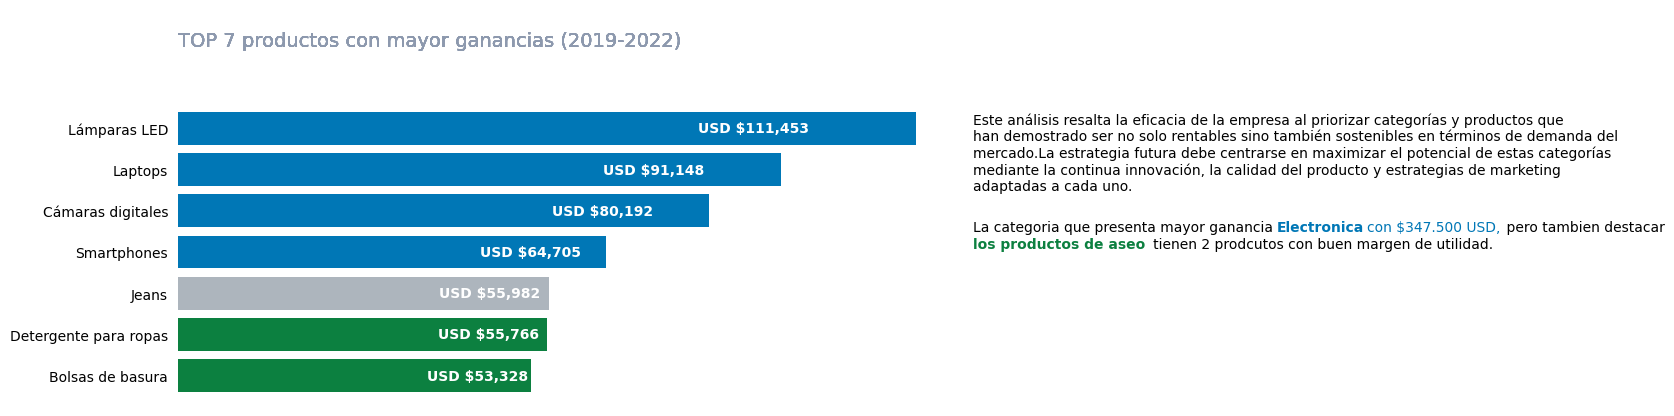

In [ ]:
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
fig,ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(wspace=0.05)
colores=["#0C8040","#0C8040","#adb5bd","#0077b6","#0077b6","#0077b6","#0077b6"]
ax.barh(df_top_ganancias['tipo_producto'],df_top_ganancias['total_ganancia'],color=colores)
##Configuramos las lineas
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
##  Con esto eliminamos señalizaciones
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
for i,valor in enumerate(df_top_ganancias['total_ganancia'].astype(int)):
  val_conve=locale.currency(valor, grouping=True).replace('.00', '')
  qtd = f"{'USD '}{val_conve}"
  ax.text(valor/1.42,i-0.1,qtd,color='white',fontweight='bold')
  ax.text(0,8,"\nTOP 7 productos con mayor ganancias (2019-2022)",fontsize=14,color='#8d99ae')

# Informe como una cadena de texto con saltos de línea
conclucion="""Este análisis resalta la eficacia de la empresa al priorizar categorías y productos que han demostrado ser no solo rentables sino también sostenibles en términos de demanda del mercado.La estrategia futura debe centrarse en maximizar el potencial de estas categorías mediante la continua innovación, la calidad del producto y estrategias de marketing adaptadas a cada uno."""
lineas = conclucion.split('\n')
informe_justificado = '\n'.join(textwrap.fill(linea, width=90) for linea in lineas)
txt=ax.text(120000,4.5,informe_justificado,fontsize=10)
txt=ax.text(120000,3.5,"La categoria que presenta mayor ganancia",fontsize=10)
txt=ax.text(166000,3.5,"Electronica",fontsize=10,color='#0077b6',fontweight='bold')
txt=ax.text(179500,3.5,"con $347.500 USD,",fontsize=10,color='#0077b6')
txt=ax.text(198000,3.5,"    pero tambien destacar",fontsize=10)
txt=ax.text(120000,3.1,"los productos de aseo",fontsize=10,color='#0C8040',fontweight='bold')
txt=ax.text(140000,3.1,"           tienen 2 prodcutos con buen margen de utilidad.",fontsize=10)

[pulse aqui](https://colab.research.google.com/drive/13TuCcm0Fqaw3_HhYv6goua28hnCSs_zt#scrollTo=enKThEdF5UE7&line=1&uniqifier=1) para informe mas detallado del TOP 7 de productos mas vendidos

4. Creamos funcion pregunta_3()

In [ ]:
def pregunta_3():
  global df_ventas, df_ventas_limpio
  ##Copia de dataframe
  df_top_ganancias=df_ventas_limpio[['tipo_producto','total_ganancia']].copy()
  ##Agupamos por tipo de producto sumando las ganancia
  df_top_ganancias=df_top_ganancias.groupby("tipo_producto").aggregate({'total_ganancia':'sum'}).reset_index()
  ## Funcion que ordena los valores
  df_top_ganancias.sort_values("total_ganancia",axis = 0, ascending = True,inplace = True, na_position ='first')
  ## Mostramos el TOP 7 forma 1
  df_top_ganancias=df_top_ganancias.tail(7)
  locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
  fig,ax = plt.subplots(figsize=(10,4))
  fig.subplots_adjust(wspace=0.05)
  colores=["#0C8040","#0C8040","#adb5bd","#0077b6","#0077b6","#0077b6","#0077b6"]
  ax.barh(df_top_ganancias['tipo_producto'],df_top_ganancias['total_ganancia'],color=colores)
  ##Configuramos las lineas
  ax.get_xaxis().set_visible(False)
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ##  Con esto eliminamos señalizaciones
  ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
  for i,valor in enumerate(df_top_ganancias['total_ganancia'].astype(int)):
    val_conve=locale.currency(valor, grouping=True).replace('.00', '')
    qtd = f"{'USD '}{val_conve}"
    ax.text(valor/1.42,i-0.1,qtd,color='white',fontweight='bold')
    ax.text(0,8,"\nTOP 7 productos con mayor ganancias (2019-2022)",fontsize=14,color='#8d99ae')

  # Informe como una cadena de texto con saltos de línea
  conclucion="""Este análisis resalta la eficacia de la empresa al priorizar categorías y productos que han demostrado ser no solo rentables sino también sostenibles en términos de demanda del mercado.La estrategia futura debe centrarse en maximizar el potencial de estas categorías mediante la continua innovación, la calidad del producto y estrategias de marketing adaptadas a cada uno."""
  lineas = conclucion.split('\n')
  informe_justificado = '\n'.join(textwrap.fill(linea, width=90) for linea in lineas)
  txt=ax.text(120000,4.5,informe_justificado,fontsize=10)
  txt=ax.text(120000,3.5,"La categoria que presenta mayor ganancia",fontsize=10)
  txt=ax.text(166000,3.5,"Electronica",fontsize=10,color='#0077b6',fontweight='bold')
  txt=ax.text(179500,3.5,"con $347.500 USD,",fontsize=10,color='#0077b6')
  txt=ax.text(198000,3.5,"    pero tambien destacar",fontsize=10)
  txt=ax.text(120000,3.1,"los productos de aseo",fontsize=10,color='#0C8040',fontweight='bold')
  txt=ax.text(140000,3.1,"           tienen 2 prodcutos con buen margen de utilidad.",fontsize=10)

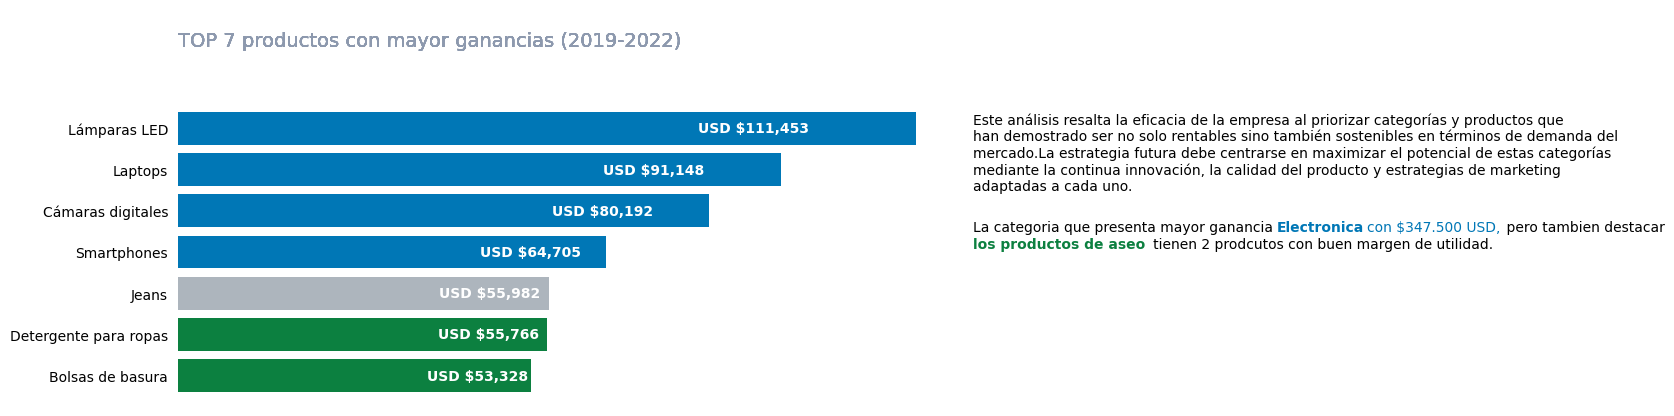

In [ ]:
pregunta_3()

In [ ]:
##Copia de dataframe limpio
df_ventas_año_region=df_ventas_limpio[['fecha_pedido','region','total_venta']].copy()

In [ ]:
print(df_ventas_año_region)

     fecha_pedido   region  total_venta
0      2021-11-09  Sureste       890.66
1      2021-11-09  Sureste      2488.59
2      2021-06-13  Sureste        49.72
4      2020-10-12      Sur        76.04
5      2019-06-10  Sureste       166.11
...           ...      ...          ...
8935   2021-09-30  Sureste       123.22
8936   2022-11-18  Noreste       271.97
8937   2022-11-18  Noreste       700.75
8938   2019-01-22  Noreste        85.83
8939   2022-05-05  Noreste       826.74

[7210 rows x 3 columns]


In [ ]:
## Creamos columna años y extraemos solo el año de la columna pedido
df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year

In [ ]:
df_ventas_año_region

,fecha_pedido,region,total_venta,año
0,2021-11-09,Sureste,890.66,2021
1,2021-11-09,Sureste,2488.59,2021
2,2021-06-13,Sureste,49.72,2021
4,2020-10-12,Sur,76.04,2020
5,2019-06-10,Sureste,166.11,2019
...,...,...,...,...
8935,2021-09-30,Sureste,123.22,2021
8936,2022-11-18,Noreste,271.97,2022
8937,2022-11-18,Noreste,700.75,2022
8938,2019-01-22,Noreste,85.83,2019


In [ ]:
## Borramos la columna fecha_pedido
df_ventas_año_region.drop('fecha_pedido',axis=1,inplace=True)

In [ ]:
df_ventas_año_region

,region,total_venta,año
0,Sureste,890.66,2021
1,Sureste,2488.59,2021
2,Sureste,49.72,2021
4,Sur,76.04,2020
5,Sureste,166.11,2019
...,...,...,...
8935,Sureste,123.22,2021
8936,Noreste,271.97,2022
8937,Noreste,700.75,2022
8938,Noreste,85.83,2019


In [ ]:
## Usar pd.crosstab
df_ventas_año_region=pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values = df_ventas_año_region['total_venta'], aggfunc='sum')

In [ ]:
## Ordenamos la informacion
df_ventas_año_region=df_ventas_año_region[['Sureste','Noreste','Centro-Oeste','Norte','Sur']]

In [ ]:
df_ventas_año_region

region,Sureste,Noreste,Centro-Oeste,Norte,Sur
año,,,,,
2019,522953.51,346407.40,67406.37,71778.74,44189.84
2020,648732.79,282431.39,90616.80,107309.38,61451.04
2021,870894.51,359829.92,125344.52,69534.02,110198.47
2022,980404.44,549254.20,97679.64,99195.86,99393.36


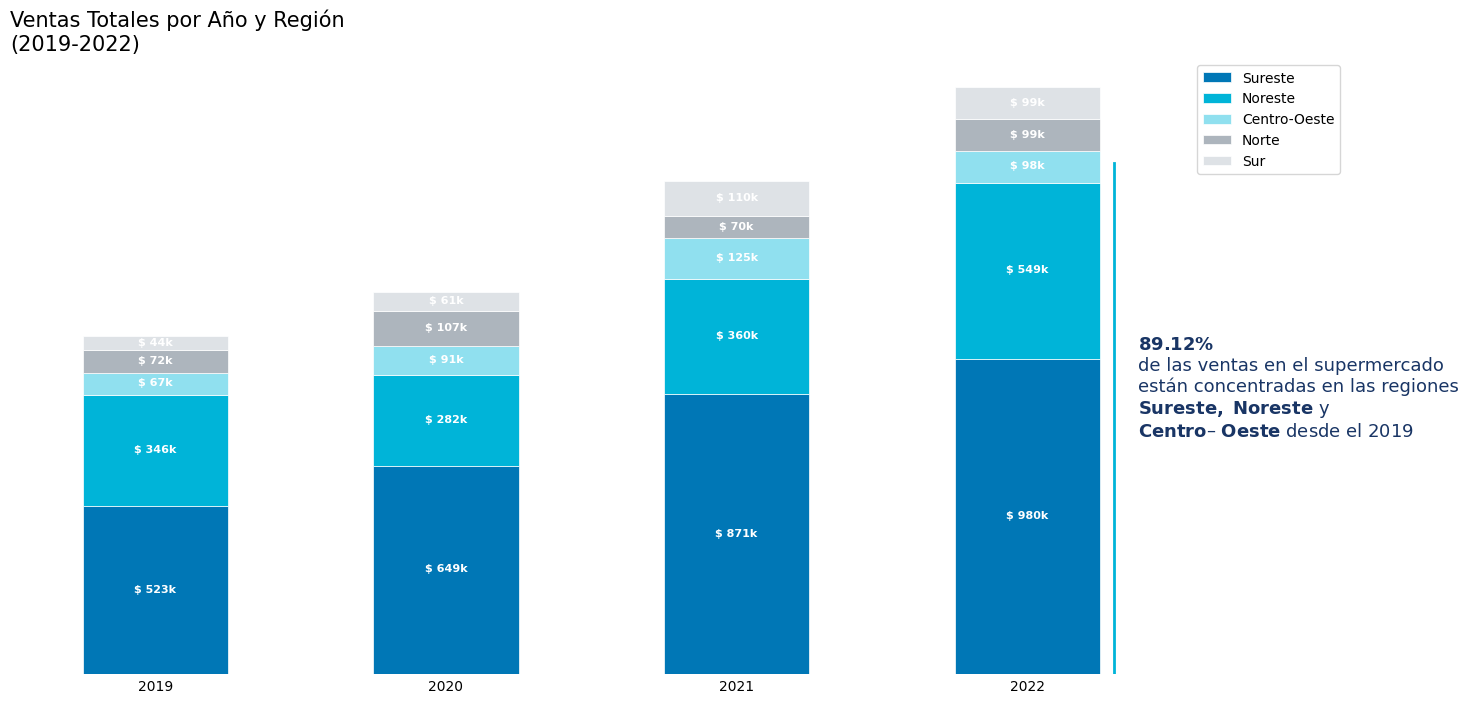

In [ ]:
# Creamos una lista de colores
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']

# Crear el gráfico de columnas apiladas con bordes más visibles
ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores, edgecolor='white', linewidth=0.5)

# Quitar la palabra "Año" en el eje x
ax.set_xlabel("")

# Quitar los ticks y etiquetas del eje y
ax.get_yaxis().set_visible(False)

# Añadir etiquetas a las barras
for container in ax.containers:
    for i, bar in enumerate(container.patches):
        height = bar.get_height()
        if height > 0:  # Asegurarse de que hay un valor para mostrar
            label = f"$ {height / 1000:.0f}k"  # Formatear el valor en formato de miles
            x_position = bar.get_x() + bar.get_width() / 2
            y_position = bar.get_y() + height / 2
            ax.annotate(label,
                        xy=(x_position, y_position),
                        xytext=(0, 1),  # Distancia vertical desde el punto
                        textcoords="offset points",
                        ha='center', va='center',  # Colocar el texto en el centro
                        fontsize=8, fontweight='bold', color='white')  # Añadir negrita al texto

# Configuracion del titulo
ax.set_title('Ventas Totales por Año y Región\n(2019-2022)', loc='left', fontsize=15,  color='black')  # Mover el título a la izquierda

# Rotar los años horizontalmente
plt.xticks(rotation=0)

# Mover la etiqueta de la región a la izquierda y ajustar la posición
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

# Texto debajo del gráfico  $\\mathbf{mayor}$ $\\mathbf{ganancia}$    $\\mathbf{2022}$
# Texto
texto = ("$\\mathbf{89.12\\%}$ \nde las ventas en el supermercado\n"
         "están concentradas en las regiones\n"
         "$\\mathbf{Sureste,}$ $\\mathbf{ Noreste}$ y\n"
         "$\\mathbf{Centro – }$ $\\mathbf{Oeste}$ desde el 2019")


# Añadir texto y alinear a la izquierda
ax.text(0.97, 0.38, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='#193565')

# Línea vertical de color azul
ax.axvline(x=3.3, ymin=0.0, ymax=0.83, color='#00b4d8', linestyle='-', linewidth=2)

# Ocultar todos los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Quitar los ticks del eje X y Y
ax.tick_params(axis='both', which='both', length=0)

# Mostrar el gráfico
plt.show()

graficoraul="""
colores=["#0077b6","#00b4d8", "#90e0ef", "#adb5bd", "#dee2e6"]
ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15,8), color=colores)
##  Con esto eliminamos señalizaciones
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,rotation=0)
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
##ax.spines['right'].set_color('none')
ax.spines['right'].set(linewidth=3, color='#0077b6')
## Tamaño de linea
ax.spines.right.set_bounds(0,1400000)
## Eliminamos X Label año
ax.set_xlabel('')
## Movemos la leyenda
ax.legend(bbox_to_anchor=(1.15,1))
ax.text(0,150000*12,"Ventas Supermercado por región\n(2019-2022)",fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
for container in ax.containers:
  #Convertir a texto y adicionar símbolo de $ al inicio
  ax.bar_label(container, label_type='center',color='white',fontweight='bold')
"""



In [ ]:
# sumamos las ventas de las regiones Sureste, Noreste y Centro-Oeste para cada año
df_ventas_concentradas = df_ventas_año_region[['Sureste', 'Noreste', 'Centro-Oeste']].sum(axis=1)

# claculamos el porcentaje con respecto al total de ventas
total_ventas = df_ventas_año_region.sum(axis=1)
porcentaje_concentradas = (df_ventas_concentradas / total_ventas) * 100

print(f"Porcentaje de ventas concentradas en Sureste, Noreste y Centro-Oeste desde 2019: {porcentaje_concentradas.iloc[-1]:.2f}%")

Porcentaje de ventas concentradas en Sureste, Noreste y Centro-Oeste desde 2019: 89.12%


In [ ]:
def pregunta_4():
    global df_ventas, df_ventas_limpio
    ##Copia de dataframe limpio
    df_ventas_año_region=df_ventas_limpio[['fecha_pedido','region','total_venta']].copy()
    ## Creamos columna años y extraemos solo el año de la columna pedido
    df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year
    ## Borramos la columna fecha_pedido
    df_ventas_año_region.drop('fecha_pedido',axis=1,inplace=True)
    ## Usar pd.crosstab
    df_ventas_año_region=pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values = df_ventas_año_region['total_venta'], aggfunc='sum')
    ## Ordenamos la informacion
    df_ventas_año_region=df_ventas_año_region[['Sureste','Noreste','Centro-Oeste','Norte','Sur']]
    # Creamos una lista de colores
    colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']

    # Crear el gráfico de columnas apiladas con bordes más visibles
    ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores, edgecolor='white', linewidth=0.5)

    # Quitar la palabra "Año" en el eje x
    ax.set_xlabel("")

    # Quitar los ticks y etiquetas del eje y
    ax.get_yaxis().set_visible(False)

    # Añadir etiquetas a las barras
    for container in ax.containers:
        for i, bar in enumerate(container.patches):
            height = bar.get_height()
            if height > 0:  # Asegurarse de que hay un valor para mostrar
                label = f"$ {height / 1000:.0f}k"  # Formatear el valor en formato de miles
                x_position = bar.get_x() + bar.get_width() / 2
                y_position = bar.get_y() + height / 2
                ax.annotate(label,
                            xy=(x_position, y_position),
                            xytext=(0, 1),  # Distancia vertical desde el punto
                            textcoords="offset points",
                            ha='center', va='center',  # Colocar el texto en el centro
                            fontsize=8, fontweight='bold', color='white')  # Añadir negrita al texto

    # Configuracion del titulo
    ax.set_title('Ventas Totales por Año y Región\n(2019-2022)', loc='left', fontsize=15,  color='black')  # Mover el título a la izquierda

    # Rotar los años horizontalmente
    plt.xticks(rotation=0)

    # Mover la etiqueta de la región a la izquierda y ajustar la posición
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

    # Texto debajo del gráfico  $\\mathbf{mayor}$ $\\mathbf{ganancia}$    $\\mathbf{2022}$
    # Texto
    texto = ("$\\mathbf{89.12\\%}$ \nde las ventas en el supermercado\n"
            "están concentradas en las regiones\n"
            "$\\mathbf{Sureste,}$ $\\mathbf{ Noreste}$ y\n"
            "$\\mathbf{Centro – }$ $\\mathbf{Oeste}$ desde el 2019")


    # Añadir texto y alinear a la izquierda
    ax.text(0.97, 0.38, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='#193565')

    # Línea vertical de color azul
    ax.axvline(x=3.3, ymin=0.0, ymax=0.83, color='#00b4d8', linestyle='-', linewidth=2)

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Quitar los ticks del eje X y Y
    ax.tick_params(axis='both', which='both', length=0)

    # Mostrar el gráfico
    plt.show()
    # Mostrar el gráfico





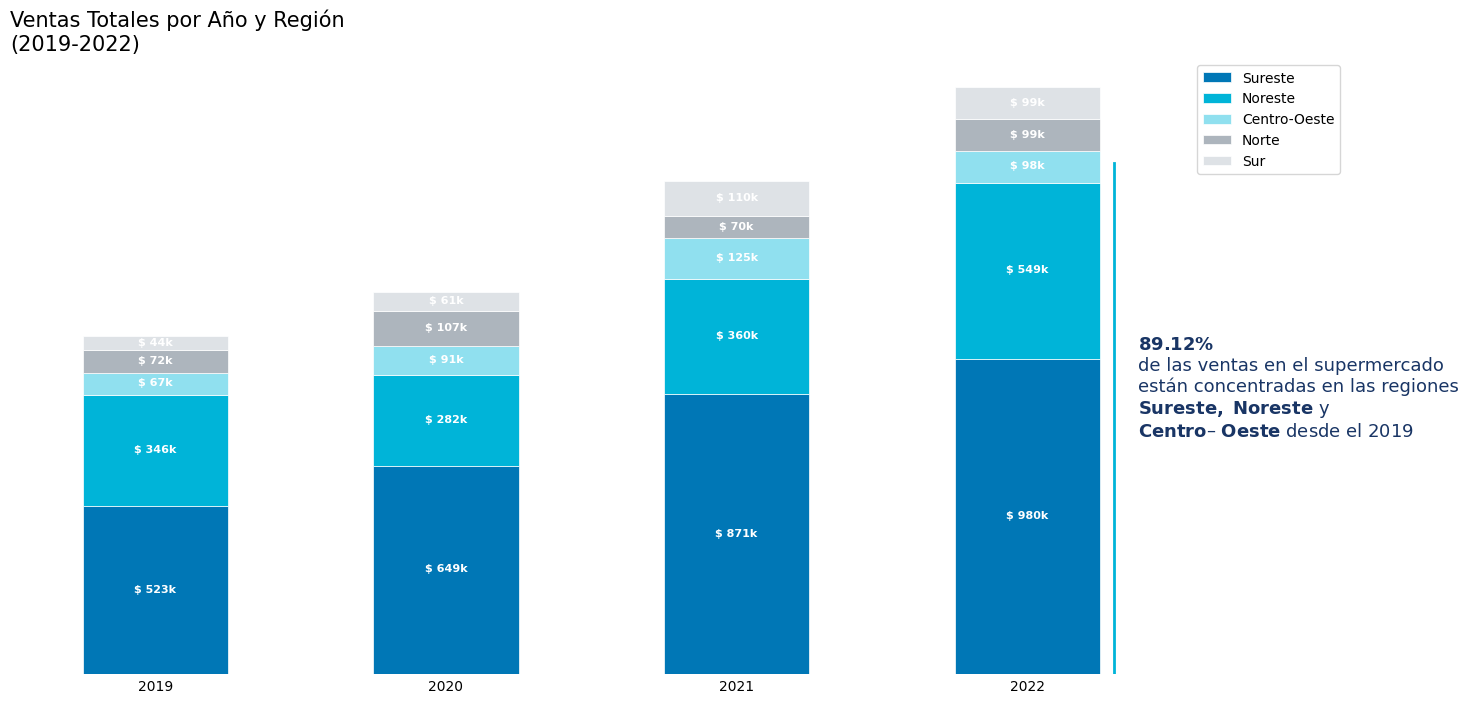

In [ ]:
pregunta_4()

### 6. Pregunta 4: ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

### 6.1 Creamos una copia de df_ventas_limpio y Guardamos solo las columnas modo_envio y segmento_cliente

In [ ]:
# Creamos una copia de df_ventas_limpio
df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
# Guardamos solo las columnas modo_envio y segmento_cliente
df_modo_envio

,modo_envio,segmento_cliente
0,Económico,B2C
1,Económico,B2C
2,Económico,B2B
4,Entrega estándar,B2C
5,Entrega estándar,B2C
...,...,...
8935,Entrega estándar,B2C
8936,Entrega estándar,B2B
8937,Entrega estándar,B2B
8938,Económico,B2C


In [ ]:
# Generamos una tabla cruzada
df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")
df_modo_envio


segmento_cliente,B2B,B2C
modo_envio,,
24 horas,171,231
Envío rápido,543,542
Económico,707,755
Entrega estándar,2048,2213


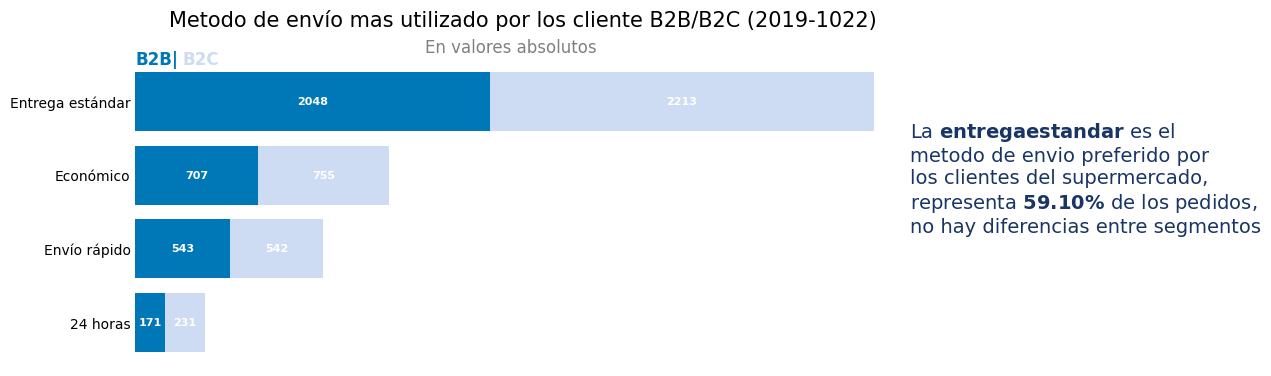

In [ ]:
# Creamos una lista de colores
colores = ['#0077b6', '#CDDBF3']

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 4))
fig.subplots_adjust(wspace=0.05)
# Crear el gráfico de barras horizontales
bars_b2b = ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[0])
bars_b2c = ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'], color=colores[1])

# Añadir etiquetas dentro de cada barra
for bar in bars_b2b:
    label_x_position = bar.get_x() + bar.get_width() / 2
    label_y_position = bar.get_y() + bar.get_height() / 2
    label_value = f"{bar.get_width():.0f}"
    ax.text(label_x_position, label_y_position, label_value,
            ha='center', va='center', color='white', fontsize=8, fontweight='bold')

for bar in bars_b2c:
    label_x_position = bar.get_x() + bar.get_width() / 2
    label_y_position = bar.get_y() + bar.get_height() / 2
    label_value = f"{bar.get_width():.0f}"
    ax.text(label_x_position, label_y_position, label_value,
            ha='center', va='center', color='white', fontsize=8, fontweight='bold')


# Configuracion del titulo
ax.set_title('Metodo de envío mas utilizado por los cliente B2B/B2C (2019-1022)\n', loc='center', fontsize=15, color='black')
plt.suptitle('\nEn valores absolutos\n',color='gray')
# Mover la leyenda a la parte superior y ajustar el espaciado
#ax.legend(['B2B | B2C'], loc='upper left')

#leyenda con el valor de segmentos de clientes
ax.text(0, 3.5, 'B2B|', fontsize=12, fontweight='bold', color=colores[0])
ax.text(270, 3.5, 'B2C', fontsize=12, fontweight='bold', color=colores[1])

# Ocultar todos los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Quitar etiquetas del eje x
ax.set_xticks([])


# Texto $\\mathbf{2022}$
texto = ("La $\\mathbf{entrega estandar}$ es el\n"
         "metodo de envio preferido por\n"
        "los clientes del supermercado,\n"
        "representa $\\mathbf{59.10\\%}$ de los pedidos,\n"
        "no hay diferencias entre segmentos\n"
         )


# Añadir texto y alinear
ax.text(1.0, 0.35, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=14, color='#193565')
# Quitar los ticks del eje X y Y
ax.tick_params(axis='both', which='both', length=0)

# Mostrar el gráfico
plt.show()


In [ ]:
# calculamos el porcentaje de entrega estándar
porcentaje_entrega_estandar = (df_modo_envio['B2B'] + df_modo_envio['B2C']).loc['Entrega estándar'] / df_modo_envio[['B2B', 'B2C']].sum().sum() * 100

print(f"El método de entrega estándar representa el {porcentaje_entrega_estandar:.2f}% de los pedidos.")

El método de entrega estándar representa el 59.10% de los pedidos.


In [ ]:
def pregunta_5():
  global df_ventas, df_ventas_limpio
  # Creamos una copia de df_ventas_limpio
  df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
  # Generamos una tabla cruzada
  df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")
  # Creamos una lista de colores
  colores = ['#0077b6', '#CDDBF3']

  # Crear la figura y el eje
  fig, ax = plt.subplots(figsize=(10, 4))
  fig.subplots_adjust(wspace=0.05)
  # Crear el gráfico de barras horizontales
  bars_b2b = ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[0])
  bars_b2c = ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'], color=colores[1])

  # Añadir etiquetas dentro de cada barra
  for bar in bars_b2b:
      label_x_position = bar.get_x() + bar.get_width() / 2
      label_y_position = bar.get_y() + bar.get_height() / 2
      label_value = f"{bar.get_width():.0f}"
      ax.text(label_x_position, label_y_position, label_value,
              ha='center', va='center', color='white', fontsize=8, fontweight='bold')

  for bar in bars_b2c:
      label_x_position = bar.get_x() + bar.get_width() / 2
      label_y_position = bar.get_y() + bar.get_height() / 2
      label_value = f"{bar.get_width():.0f}"
      ax.text(label_x_position, label_y_position, label_value,
              ha='center', va='center', color='white', fontsize=8, fontweight='bold')


  # Configuracion del titulo
  ax.set_title('Metodo de envío mas utilizado por los cliente B2B/B2C (2019-1022)\n', loc='center', fontsize=15, color='black')
  plt.suptitle('\nEn valores absolutos\n',color='gray')
  # Mover la leyenda a la parte superior y ajustar el espaciado
  #ax.legend(['B2B | B2C'], loc='upper left')

  #leyenda con el valor de segmentos de clientes
  ax.text(0, 3.5, 'B2B|', fontsize=12, fontweight='bold', color=colores[0])
  ax.text(270, 3.5, 'B2C', fontsize=12, fontweight='bold', color=colores[1])

  # Ocultar todos los bordes del gráfico
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # Quitar etiquetas del eje x
  ax.set_xticks([])


  # Texto $\\mathbf{2022}$
  texto = ("La $\\mathbf{entrega estandar}$ es el\n"
            "metodo de envio preferido por\n"
            "los clientes del supermercado,\n"
            "representa $\\mathbf{59.10\\%}$ de los pedidos,\n"
            "no hay diferencias entre segmentos\n"
            )


  # Añadir texto y alinear
  ax.text(1.0, 0.35, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=14, color='#193565')
  # Quitar los ticks del eje X y Y
  ax.tick_params(axis='both', which='both', length=0)

  # Mostrar el gráfico
  plt.show()

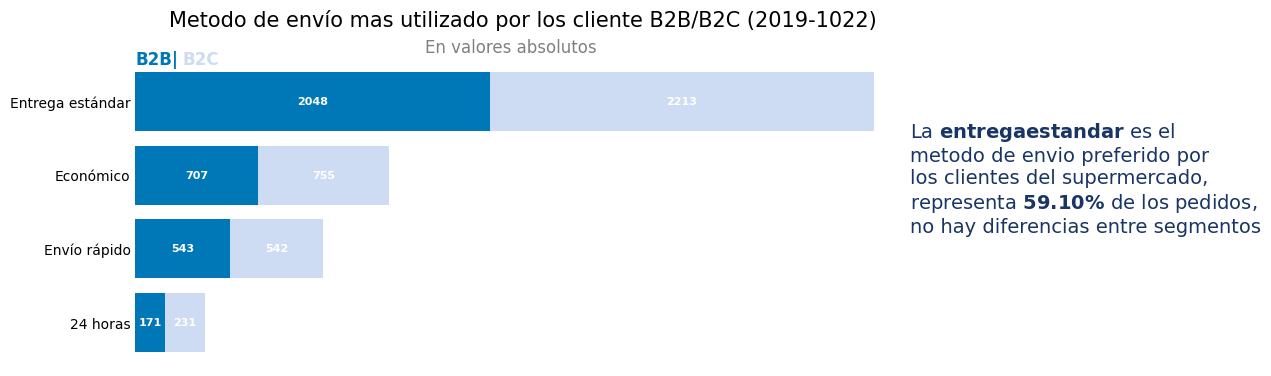

In [ ]:
pregunta_5()

7 Pregunta 5: ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?


7.1 Creamos una copia y filtramos los registros, seleccionamos las columnas fecha_pedido y total_venta y establecemos la columna fecha_pedido como índice

In [ ]:
# Creamos una copia y filtramos los registros
df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'].copy()

# Seleccionamos las columnas fecha_pedido y total_venta
df_ventas_sp = df_ventas_sp[['fecha_pedido', 'total_venta']]

# Establecemos la columna fecha_pedido como índice
df_ventas_sp.set_index('fecha_pedido', inplace=True)

df_ventas_sp.head()

,total_venta
fecha_pedido,
2021-11-09,890.66
2021-11-09,2488.59
2019-11-12,2263.98
2022-09-11,500.36
2019-10-21,720.64


In [ ]:
df_ventas_sp.dtypes

total_venta    float64
dtype: object

### 7.2 Con resample agrupamos las ventas por trimestre ('Q') y sumamos los valores en forma trimestral

In [ ]:
# agrupamos las ventas por trimestre ('Q') y sumamos los valores en forma trimestral
# df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')
df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')

# Agrupa las ventas por trimestre y suma los valores
df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
df_ventas_sp

,total_venta
fecha_pedido,
2019-03-31,27377.18
2019-06-30,33951.90
2019-09-30,90208.89
2019-12-31,124093.79
2020-03-31,26732.22
...,...
2021-12-31,236502.75
2022-03-31,61785.08
2022-06-30,74727.59


### 7.3 Redondear la columna total_venta a la escala de miles

In [ ]:
# Redondear la columna total_venta a la escala de miles
df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].round()

# Formatear la columna total_venta para mostrarla en miles con dos decimales
df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].apply(lambda x: f'{x/1000:.2f}')

df_ventas_sp


,total_venta
fecha_pedido,
2019-03-31,27.38
2019-06-30,33.95
2019-09-30,90.21
2019-12-31,124.09
2020-03-31,26.73
...,...
2021-12-31,236.50
2022-03-31,61.78
2022-06-30,74.73


In [ ]:
# Convertir la columna total_venta a tipo numérico
df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'])

In [ ]:
df_ventas_sp.dtypes

total_venta    float64
dtype: object

### 7.4 eliminamos el índice existente y creamos uno nuevo, el parámetro drop=True evita que se agregue una columna adicional con el índice anterior

In [ ]:
# Restablecer el índice y mantener la columna 'fecha_pedido'
df_ventas_sp = df_ventas_sp.reset_index()
df_ventas_sp


,fecha_pedido,total_venta
0,2019-03-31,27.38
1,2019-06-30,33.95
2,2019-09-30,90.21
3,2019-12-31,124.09
4,2020-03-31,26.73
...,...,...
11,2021-12-31,236.50
12,2022-03-31,61.78
13,2022-06-30,74.73
14,2022-09-30,144.52


In [ ]:
df_ventas_sp

,fecha_pedido,total_venta
0,2019-03-31,27.38
1,2019-06-30,33.95
2,2019-09-30,90.21
3,2019-12-31,124.09
4,2020-03-31,26.73
...,...,...
11,2021-12-31,236.50
12,2022-03-31,61.78
13,2022-06-30,74.73
14,2022-09-30,144.52


### 7.5 Visualizacion

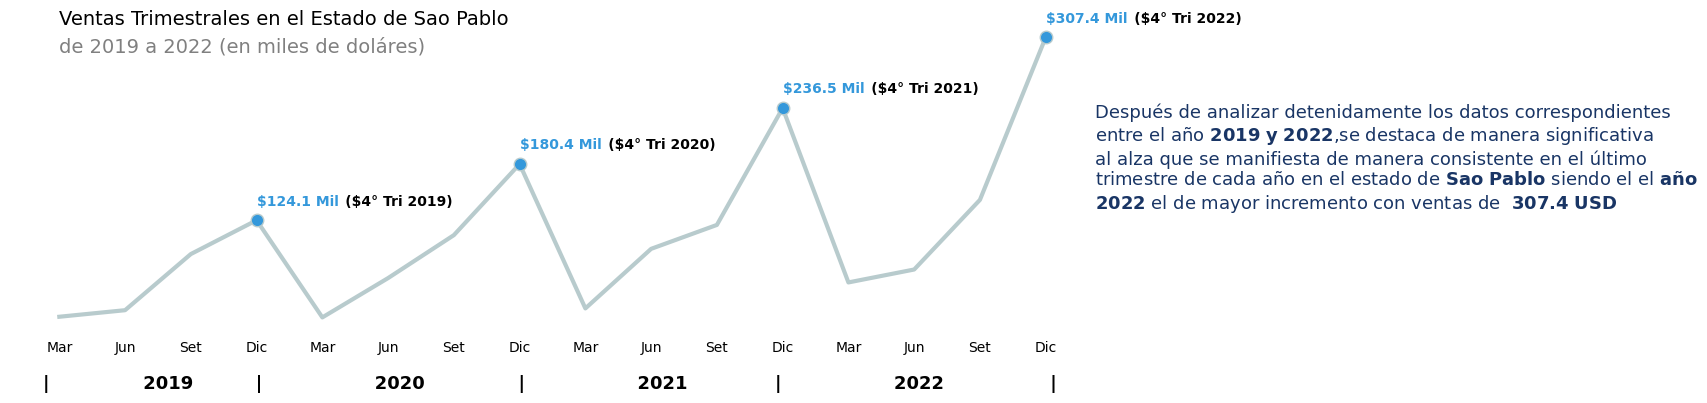

In [ ]:
# Configuración de la figura y el eje
fig, ax = plt.subplots(figsize=(14, 4))

# Crear el gráfico de líneas
puntos_a_marcar = [False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True]
ax.plot(df_ventas_sp.index, df_ventas_sp['total_venta'], marker="o",markerfacecolor='#3498db',markersize=9,markevery=puntos_a_marcar,color='#b8cbcd', linewidth=3)
# Reemplazar las fechas en el eje X por el nombre del mes
x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
ax.set_xticks(df_ventas_sp.index)
ax.set_xticklabels(x_labels, ha="center")
años_comp=["4° Tri 2019","4° Tri 2020","4° Tri 2021","4° Tri 2022"]
# Colocar valores solo en el 4to Trimestre
for i in range(3, len(df_ventas_sp), 4):
    max_value = df_ventas_sp['total_venta'][i:i+4].max()
    max_index = df_ventas_sp['total_venta'][i:i+4].idxmax()
    ax.text(max_index, max_value + 15, f"${max_value:,.1f} Mil", ha='left',color='#3498db',fontweight='bold')
    if i==3 :
       ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-3]})", ha='left',fontweight='bold')
    elif i==7:
       ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-6]})", ha='left',fontweight='bold')
    elif i==11:
       ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-9]})", ha='left',fontweight='bold')
    elif i==15:
       ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-12]})", ha='left',fontweight='bold')

    # Configuramos el titulo
ax.text(0,320,'Ventas Trimestrales en el Estado de Sao Pablo',fontsize=14, color='black')
ax.text(0,292,'de 2019 a 2022 (en miles de doláres)',fontsize=14, color='gray')
#ax.set_xlabel('Trimestre')
#ax.set_ylabel('Total de Ventas ($)')
texto = ("Después de analizar detenidamente los datos correspondientes\n"
          "entre el año $\\mathbf{2019}$ $\\mathbf{y}$ $\\mathbf{2022}$,se destaca de manera significativa\n"
          "al alza que se manifiesta de manera consistente en el último\n"
          "trimestre de cada año en el estado de $\\mathbf{Sao}$ $\\mathbf{Pablo}$ siendo el el $\\mathbf{año}$\n"
          "$\\mathbf{2022}$ el de mayor incremento con ventas de  $\\mathbf{307.4}$ $\\mathbf{USD}$"
            )


    # Añadir texto y alinear a la izquierda
ax.text(1, 0.38, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='#193565')
# Ocultar todos los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# Ocultar etiquetas del eje y
ax.set_yticks([])

# Texto
textos = ("|               2019          |                  2020               |                  2021              |                  2022                 |")

# Añadir texto y alinear
ax.text(0.03, -0.2, textos, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='black',fontweight='bold')

# Mostrar el gráfico
plt.show()

In [ ]:
def pregunta_6():
  global df_ventas, df_ventas_limpio
  # Creamos una copia y filtramos los registros
  df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'].copy()

  # Seleccionamos las columnas fecha_pedido y total_venta
  df_ventas_sp = df_ventas_sp[['fecha_pedido', 'total_venta']]

  # Establecemos la columna fecha_pedido como índice
  df_ventas_sp.set_index('fecha_pedido', inplace=True)

  # agrupamos las ventas por trimestre ('Q') y sumamos los valores en forma trimestral
  # df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')
  df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')

  # Agrupa las ventas por trimestre y suma los valores
  df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')

  # Redondear la columna total_venta a la escala de miles
  df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].round()

  # Formatear la columna total_venta para mostrarla en miles con dos decimales
  df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].apply(lambda x: f'{x/1000:.2f}')

  # Convertir la columna total_venta a tipo numérico
  df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'])

  # Restablecer el índice y mantener la columna 'fecha_pedido'
  df_ventas_sp = df_ventas_sp.reset_index()

  # Configuración de la figura y el eje
  fig, ax = plt.subplots(figsize=(14, 4))

  # Crear el gráfico de líneas
  puntos_a_marcar = [False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True]
  ax.plot(df_ventas_sp.index, df_ventas_sp['total_venta'], marker="o",markerfacecolor='#3498db',markersize=9,markevery=puntos_a_marcar,color='#b8cbcd', linewidth=3)
  # Reemplazar las fechas en el eje X por el nombre del mes
  x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
  ax.set_xticks(df_ventas_sp.index)
  ax.set_xticklabels(x_labels, ha="center")
  años_comp=["4° Tri 2019","4° Tri 2020","4° Tri 2021","4° Tri 2022"]
  # Colocar valores solo en el 4to Trimestre
  for i in range(3, len(df_ventas_sp), 4):
      max_value = df_ventas_sp['total_venta'][i:i+4].max()
      max_index = df_ventas_sp['total_venta'][i:i+4].idxmax()
      ax.text(max_index, max_value + 15, f"${max_value:,.1f} Mil", ha='left',color='#3498db',fontweight='bold')
      if i==3 :
        ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-3]})", ha='left',fontweight='bold')
      elif i==7:
        ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-6]})", ha='left',fontweight='bold')
      elif i==11:
        ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-9]})", ha='left',fontweight='bold')
      elif i==15:
        ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-12]})", ha='left',fontweight='bold')

      # Configuramos el titulo
  ax.text(0,320,'Ventas Trimestrales en el Estado de Sao Pablo',fontsize=14, color='black')
  ax.text(0,292,'de 2019 a 2022 (en miles de doláres)',fontsize=14, color='gray')
  #ax.set_xlabel('Trimestre')
  #ax.set_ylabel('Total de Ventas ($)')
  texto = ("Después de analizar detenidamente los datos correspondientes\n"
          "entre el año $\\mathbf{2019}$ $\\mathbf{y}$ $\\mathbf{2022}$,se destaca de manera significativa\n"
          "al alza que se manifiesta de manera consistente en el último\n"
          "trimestre de cada año en el estado de $\\mathbf{Sao}$ $\\mathbf{Pablo}$ siendo el el $\\mathbf{año}$\n"
          "$\\mathbf{2022}$ el de mayor incremento con ventas de  $\\mathbf{307.4}$ $\\mathbf{USD}$"
            )


      # Añadir texto y alinear a la izquierda
  ax.text(1, 0.38, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='#193565')
  # Ocultar todos los bordes del gráfico
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)

  ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
  # Ocultar etiquetas del eje y
  ax.set_yticks([])

  # Texto
  textos = ("|               2019          |                  2020               |                  2021              |                  2022                 |")

  # Añadir texto y alinear
  ax.text(0.03, -0.2, textos, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='black',fontweight='bold')

  # Mostrar el gráfico
  plt.show()
7

7

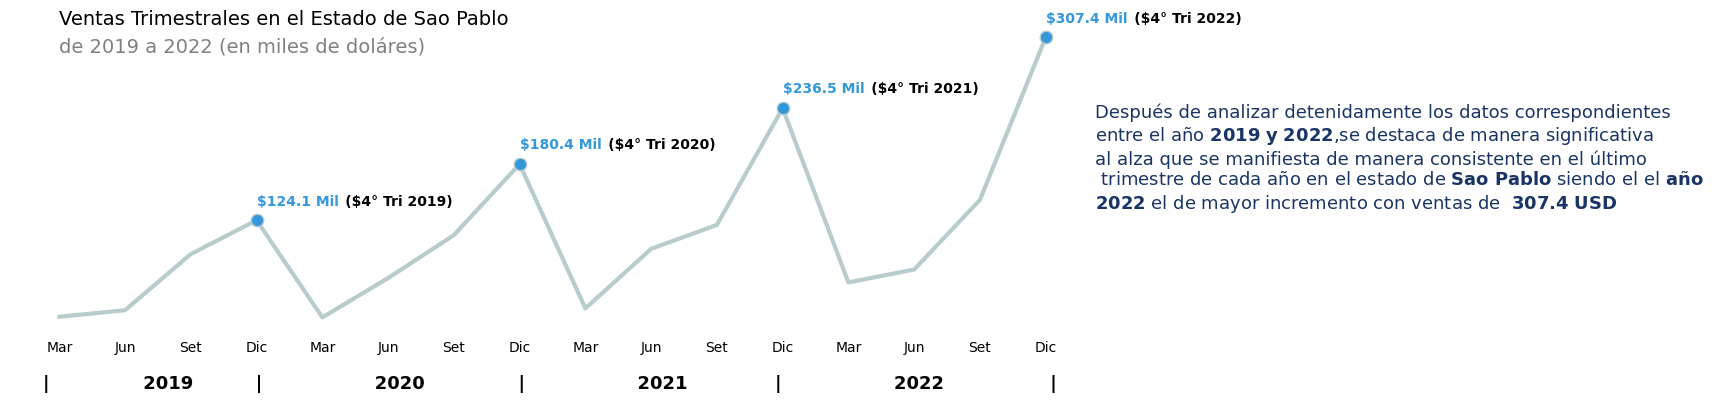

In [ ]:
pregunta_6()

### 8. Clientes que mas compras han realizado

In [ ]:
# agrupamos por el nombre del cliente y sumamos el valor de la venta
compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

# ordenamos en orden descendente
compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)

In [ ]:
# agrupamos por el nombre del cliente y sumamos el valor de la venta
compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

# ordenamos en orden descendente
compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)

# seleccionamos  los 10 primeros clientes
top_10_clientes = compras_por_cliente.head(10)


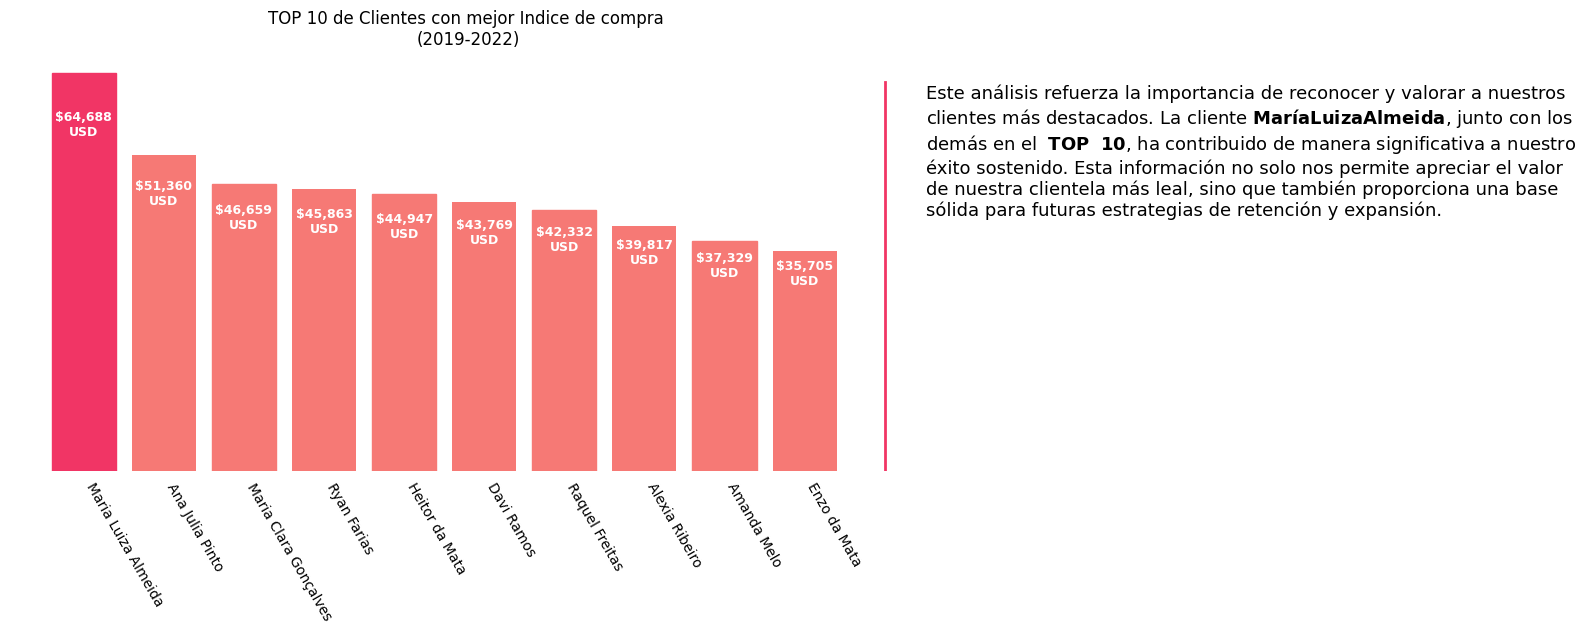

In [ ]:
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
colores = ['#f13565', '#f67975', '#f67975', '#f67975', '#f67975', '#f67975', '#f67975', '#f67975', '#f67975', '#f67975']
# graficamos
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_10_clientes['nombre_cliente'], top_10_clientes['total_venta'].astype(int), color=colores)

# Agrega los valores en las barras
for bar in bars:
    yval =int(bar.get_height())
    val_conve=locale.currency(yval, grouping=True).replace('00', '')
    syval=f"${yval:,.0f}\nUSD"  ##round(yval, 2)
    plt.text(bar.get_x()+ bar.get_width()/2, yval/1.2, syval, ha='center', va='bottom', fontsize=9,color='white',fontweight='bold')

##plt.xlabel('Clientes')
##plt.ylabel('Total de Ventas')

# Cambia los colores de las barras
for i, bar in enumerate(bars):
    if i % 2 == 0:
        bar.set_color(colores[i])

plt.xticks(rotation=300, ha='left')
plt.tight_layout()
ax.set_title("TOP 10 de Clientes con mejor Indice de compra \n(2019-2022)")
# Ocultar todos los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# Ocultar etiquetas del eje y
ax.set_yticks([])
texto = ("Este análisis refuerza la importancia de reconocer y valorar a nuestros\n"
          "clientes más destacados. La cliente $\\mathbf{María Luiza Almeida}$, junto con los \n"
          "demás en el  $\\mathbf{TOP}$  $\\mathbf{10}$, ha contribuido de manera significativa a nuestro\n"
          "éxito sostenido. Esta información no solo nos permite apreciar el valor\n"
          "de nuestra clientela más leal, sino que también proporciona una base\n"
          "sólida para futuras estrategias de retención y expansión."
            )


      # Añadir texto y alinear a la izquierda
ax.text(1, 0.6, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13)
# Línea vertical de color azul
ax.axvline(x=10, ymin=0.0, ymax=0.93, color='#f13565', linestyle='-', linewidth=2)
plt.show()


In [ ]:
def pregunta_7():
   global df_ventas, df_ventas_limpio
   # agrupamos por el nombre del cliente y sumamos el valor de la venta
   compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

   # ordenamos en orden descendente
   compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)
   # agrupamos por el nombre del cliente y sumamos el valor de la venta
   compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

   # ordenamos en orden descendente
   compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)

   # seleccionamos  los 10 primeros clientes
   top_10_clientes = compras_por_cliente.head(10)
   locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
   colores = ['#f13565', '#f67975', '#f67975', '#f67975', '#f67975', '#f67975', '#f67975', '#f67975', '#f67975', '#f67975']
    # graficamos
   fig, ax = plt.subplots(figsize=(10, 6))
   bars = ax.bar(top_10_clientes['nombre_cliente'], top_10_clientes['total_venta'].astype(int), color=colores)

    # Agrega los valores en las barras
   for bar in bars:
        yval =int(bar.get_height())
        val_conve=locale.currency(yval, grouping=True).replace('00', '')
        syval=f"${yval:,.0f}\nUSD"  ##round(yval, 2)
        plt.text(bar.get_x()+ bar.get_width()/2, yval/1.2, syval, ha='center', va='bottom', fontsize=9,color='white',fontweight='bold')

    ##plt.xlabel('Clientes')
    ##plt.ylabel('Total de Ventas')

    # Cambia los colores de las barras
   for i, bar in enumerate(bars):
        if i % 2 == 0:
            bar.set_color(colores[i])

   plt.xticks(rotation=300, ha='left')
   plt.tight_layout()
   ax.set_title("TOP 10 de Clientes con mejor Indice de compra \n(2019-2022)")
   # Ocultar todos los bordes del gráfico
   ax.spines['top'].set_visible(False)
   ax.spines['bottom'].set_visible(False)
   ax.spines['left'].set_visible(False)
   ax.spines['right'].set_visible(False)

   ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
   # Ocultar etiquetas del eje y
   ax.set_yticks([])
   texto = ("Este análisis refuerza la importancia de reconocer y valorar a nuestros\n"
              "clientes más destacados. La cliente $\\mathbf{María Luiza Almeida}$, junto con los \n"
              "demás en el  $\\mathbf{TOP}$  $\\mathbf{10}$, ha contribuido de manera significativa a nuestro\n"
              "éxito sostenido. Esta información no solo nos permite apreciar el valor\n"
              "de nuestra clientela más leal, sino que también proporciona una base\n"
              "sólida para futuras estrategias de retención y expansión."
                )


   # Añadir texto y alinear a la izquierda
   ax.text(1, 0.6, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13)
    # Línea vertical de color azul
   ax.axvline(x=10, ymin=0.0, ymax=0.93, color='#f13565', linestyle='-', linewidth=2)
   plt.show()


In [ ]:
pregunta_1()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int64  
 15  tota

<ipython-input-652-694b46c4b43f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['nombre_cliente']=='prueba')].index,inplace=True)
<ipython-input-652-694b46c4b43f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_limpio.drop(df_ventas_limpio[(df_ventas_limpio['nombre_cliente'].isnull())].index,inplace=True)
<ipython-input-652-694b46c4b43f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

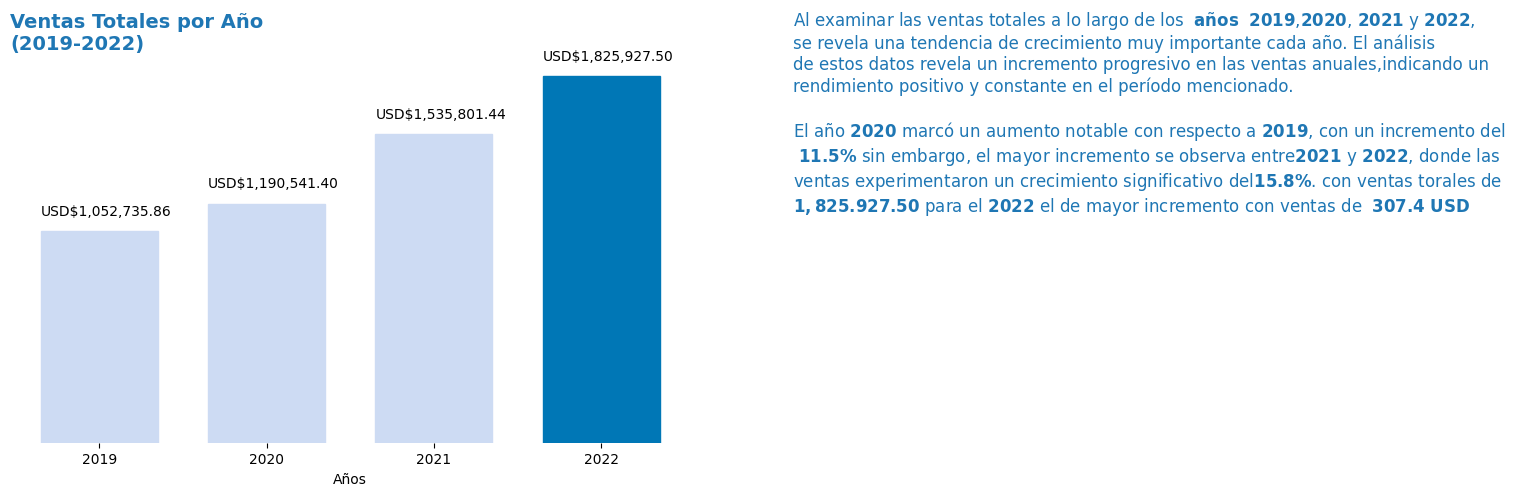

In [ ]:
pregunta_2()

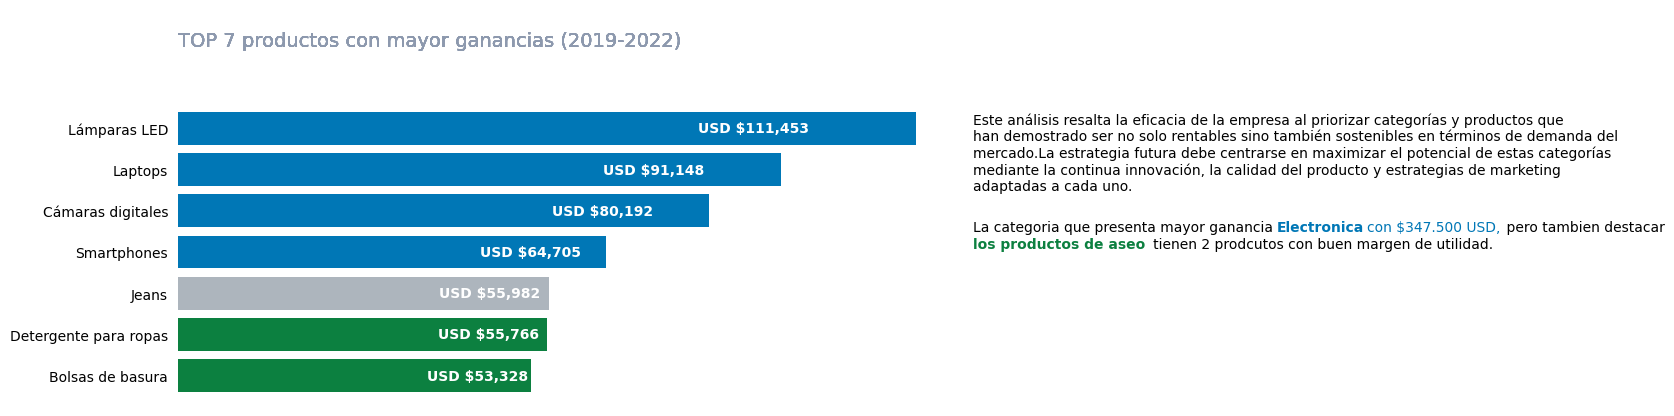

In [ ]:
pregunta_3()

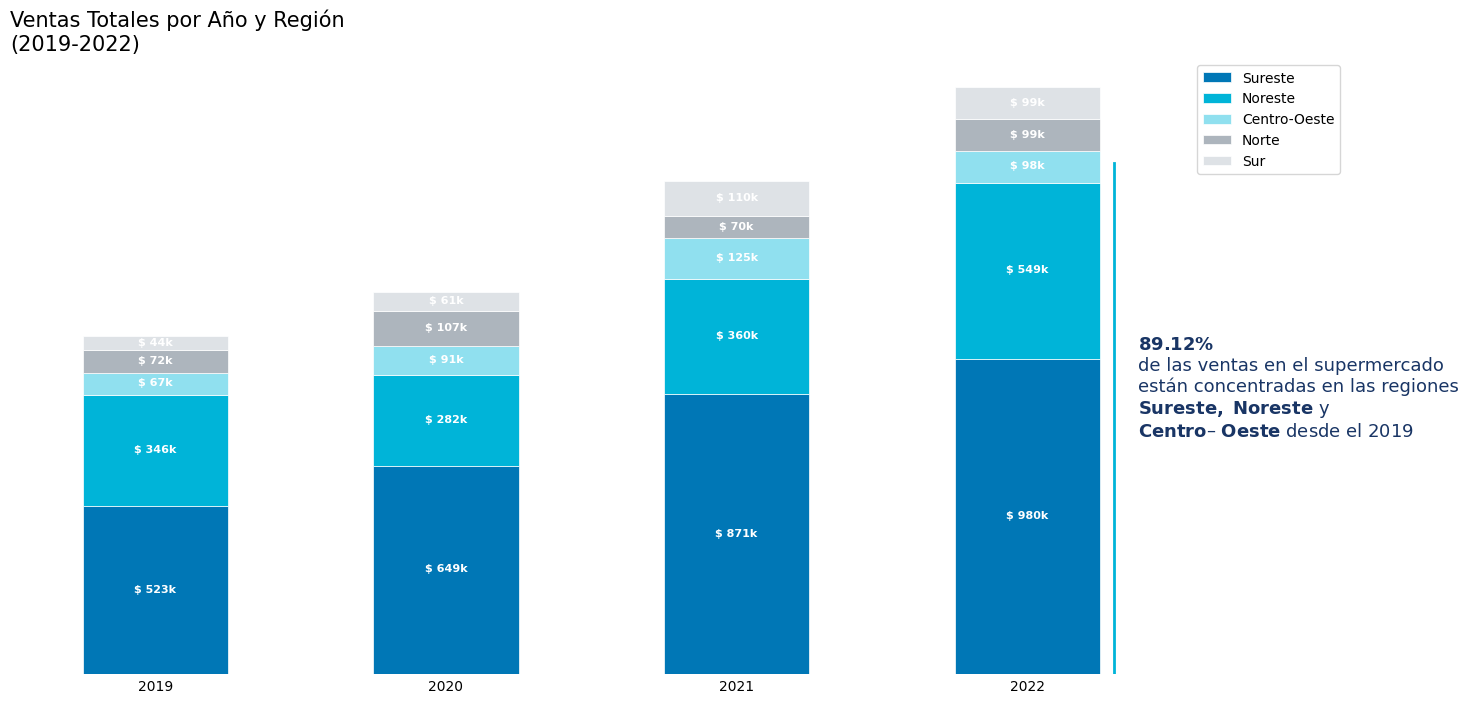

In [ ]:
pregunta_4()

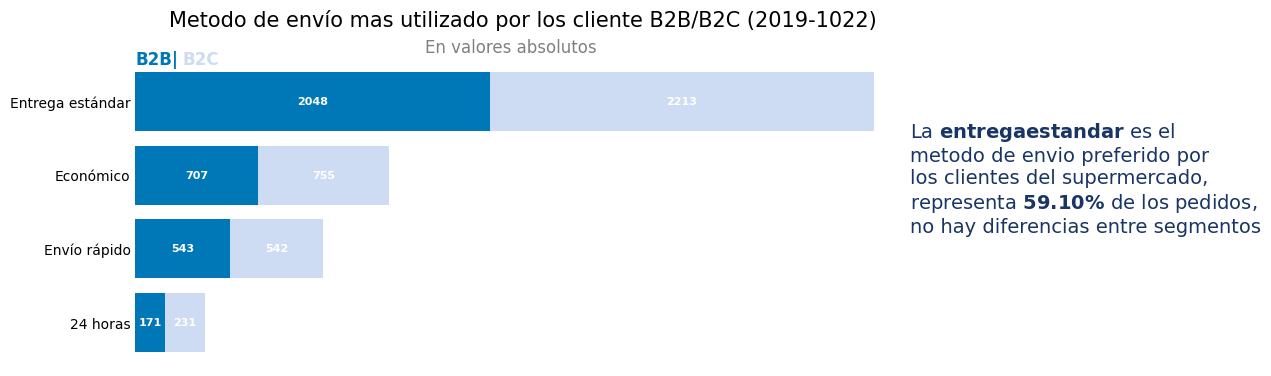

In [ ]:
pregunta_5()

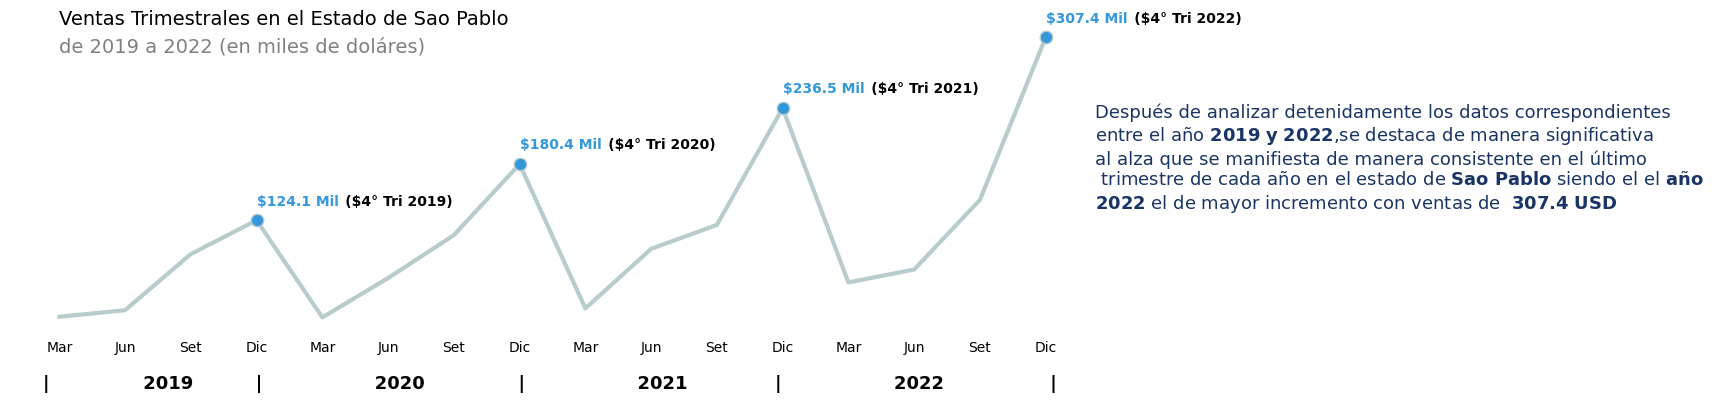

In [ ]:
pregunta_6()

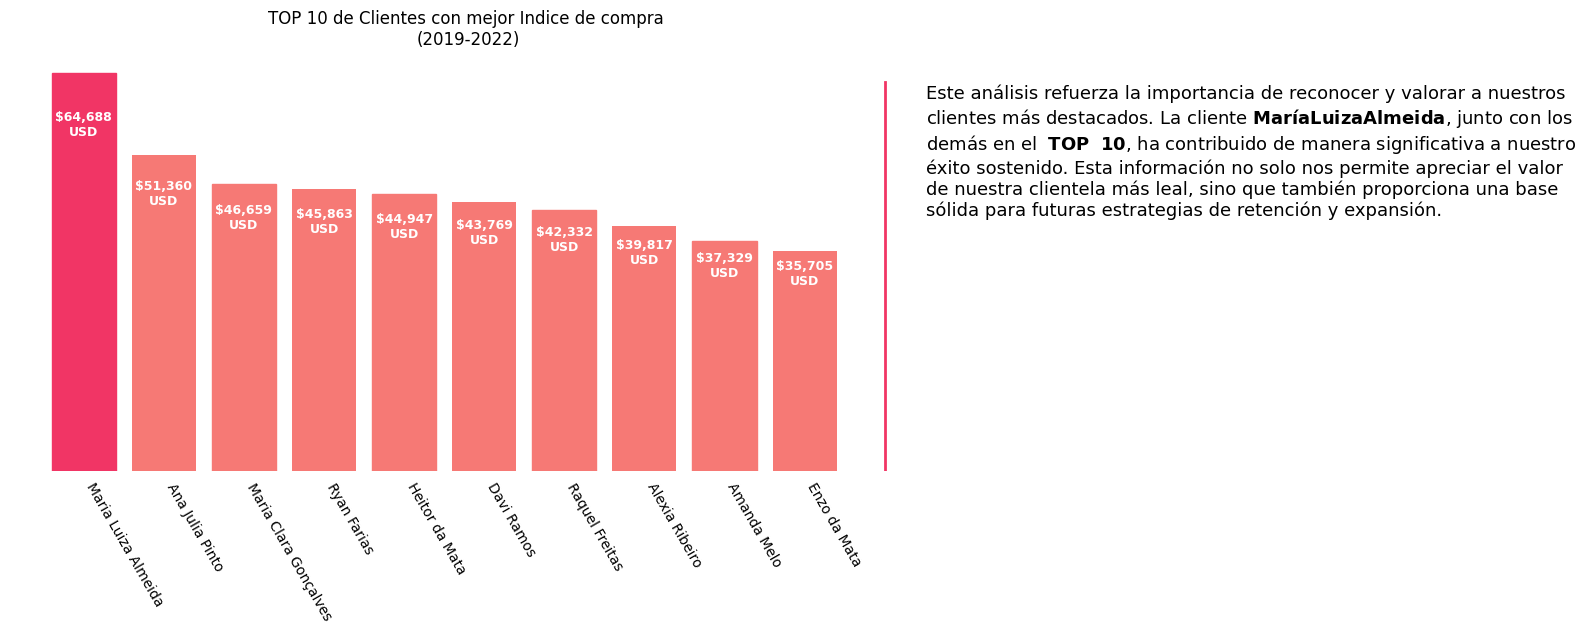

In [ ]:
pregunta_7()

# Análisis de Utilidades por Categorías y Productos (2019-2022)


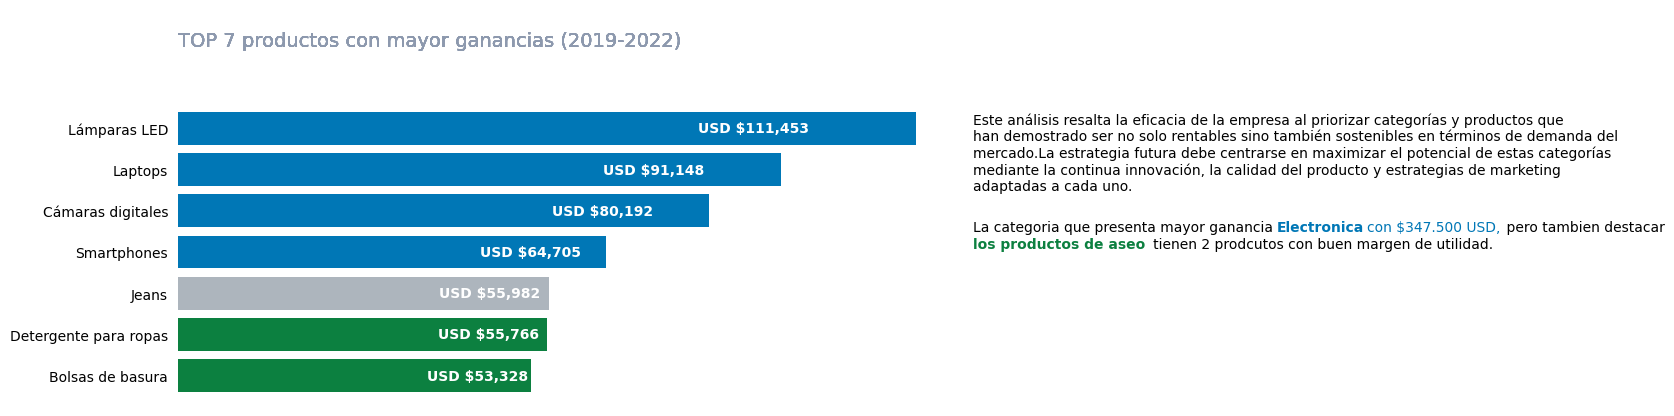

**Análisis de Utilidades por Categorías y Productos (2019-2022)**


Este informe destaca el rendimiento financiero sobresaliente de la empresa durante el período 2019-2022, centrándose en las categorías y productos que emergieron como líderes en utilidades. El análisis detallado revela que las categorías más rentables, ordenadas por utilidades acumuladas, son las siguientes:


**1. Electrónicos: Utilidad $347.500 USD**


  **1.1 Lámparas LED:**
  Destacadas utilidades de 111.453 USD.
  Estrategia recomendada: Continuar liderando en innovación para mantener la posición en el mercado de iluminación LED.


  1.2 Laptops:
  Contribución significativa con utilidades de 91.148 USD.
  Estrategia recomendada: Mantener la agilidad para adaptarse a las tendencias tecnológicas y explorar asociaciones estratégicas.


  1.3 Cámaras Digitales:
  Rendimiento sólido con utilidades de 80.193 USD.
  Estrategia recomendada: Diferenciación constante mediante innovación y estrategias de marketing específicas.


  1.4 Smartphones:
  Utilidades notables de 64,706 USD.
  Estrategia recomendada: Enfocarse en características distintivas y campañas de marketing eficaces para mantener la competitividad.


**2. Productos de Limpieza: Utilidad $109.094**


  2.1 Detergente de Ropas:
  Líder en la categoría con utilidades de 55,766 USD.
  Estrategia recomendada: Explorar fórmulas respetuosas con el medio ambiente y resaltar estas características en las campañas de marketing.


  2.2 Bolsas de Basura:
  Sólido desempeño con utilidades de 53.328 USD.
  Estrategia recomendada: Investigar opciones de productos biodegradables y mantener altos estándares de calidad.


**3. Prendas de Vestir: Utilidad $55.893 USD**


  3.1 Jeans:
  Ventas destacadas de 55.893 USD.
  Estrategia recomendada: Mantener la calidad y explorar estrategias de marketing específicas para impulsar la demanda.


**Conclusiones:**


Este análisis resalta la eficacia de la empresa al priorizar categorías y productos que han demostrado ser no solo rentables sino también sostenibles en términos de demanda del mercado. La estrategia futura debe centrarse en maximizar el potencial de estas categorías mediante la continua innovación, la calidad del producto y estrategias de marketing adaptadas a cada uno.